In [ ]:
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns
from fbprophet import Prophet
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
import time

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
cases_df = pd.read_csv(io.BytesIO(uploaded['cases.csv']))

Saving cases.csv to cases.csv


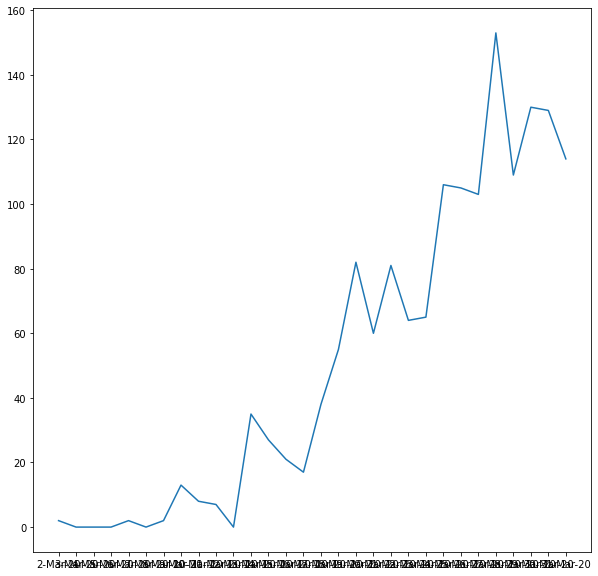

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(cases_df['date'], cases_df['new_confirmed'])
#plt.plot(cases_df['new_confirmed'])

In [ ]:
cases_df

,date,new_tested,acc_tested,new_confirmed,acc_confirmed,acc_negative,being_checked,isolated,new_released,acc_released,new_deceased,acc_deceased,positive_rate,negative_rate,decease_rate,release_rate,dailypositive_rate
0,2-Mar-20,NaN,339,2,2,335,2,2,0,0,0,0,0.59%,98.82%,0.00%,0.00%,0.00%
1,3-Mar-20,2.0,341,0,2,337,2,2,0,0,0,0,0.59%,98.83%,0.00%,0.00%,0.00%
2,4-Mar-20,31.0,372,0,2,356,14,2,0,0,0,0,0.54%,95.70%,0.00%,0.00%,0.00%
3,5-Mar-20,16.0,388,0,2,371,15,2,0,0,0,0,0.52%,95.62%,0.00%,0.00%,0.00%
4,6-Mar-20,62.0,450,2,4,422,24,4,0,0,0,0,0.89%,93.78%,0.00%,0.00%,3.23%
5,7-Mar-20,4.0,454,0,4,422,28,4,0,0,0,0,0.88%,92.95%,0.00%,0.00%,0.00%
6,8-Mar-20,29.0,483,2,6,445,32,6,0,0,0,0,1.24%,92.13%,0.00%,0.00%,6.90%
7,9-Mar-20,60.0,543,13,19,487,37,19,0,0,0,0,3.50%,89.69%,0.00%,0.00%,21.67%
8,10-Mar-20,151.0,694,8,27,648,19,27,0,0,0,0,3.89%,93.37%,0.00%,0.00%,5.30%
9,11-Mar-20,99.0,793,7,34,744,15,30,2,2,2,2,4.29%,93.82%,5.88%,5.88%,7.07%


In [ ]:
cases_df.head(2)

,date,new_tested,acc_tested,new_confirmed,acc_confirmed,acc_negative,being_checked,isolated,new_released,acc_released,new_deceased,acc_deceased,positive_rate,negative_rate,decease_rate,release_rate,dailypositive_rate
0,2-Mar-20,NaN,339,2,2,335,2,2,0,0,0,0,0.59%,98.82%,0.00%,0.00%,0.00%
1,3-Mar-20,2.0,341,0,2,337,2,2,0,0,0,0,0.59%,98.83%,0.00%,0.00%,0.00%


In [ ]:
cases_df.tail(2)

,date,new_tested,acc_tested,new_confirmed,acc_confirmed,acc_negative,being_checked,isolated,new_released,acc_released,new_deceased,acc_deceased,positive_rate,negative_rate,decease_rate,release_rate,dailypositive_rate
28,30-Mar-20,129.0,6663,129,1414,5249,0,1217,11,75,8,122,21.22%,78.78%,8.63%,5.30%,100.00%
29,31-Mar-20,114.0,6777,114,1528,5249,0,1311,6,81,14,136,22.55%,77.45%,8.90%,5.30%,100.00%


In [ ]:
kolom=len(cases_df.columns)
print(kolom)
for i in range (0, kolom):
  cases_df=cases_df[cases_df.iloc[:,i]!='?']
  cases_df=cases_df[cases_df.iloc[:,i]!='']
  cases_df=cases_df[~cases_df.iloc[:,i].isna()]
cases_df.info()

17
<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 1 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                28 non-null     object 
 1   new_tested          28 non-null     float64
 2   acc_tested          28 non-null     int64  
 3   new_confirmed       28 non-null     int64  
 4   acc_confirmed       28 non-null     int64  
 5   acc_negative        28 non-null     int64  
 6   being_checked       28 non-null     int64  
 7   isolated            28 non-null     int64  
 8   new_released        28 non-null     int64  
 9   acc_released        28 non-null     int64  
 10  new_deceased        28 non-null     int64  
 11  acc_deceased        28 non-null     int64  
 12  positive_rate       28 non-null     object 
 13  negative_rate       28 non-null     object 
 14  decease_rate        28 non-null     object 
 15  release_rate        28 non-null     object 
 16  dailypo

In [ ]:
#cases_df_sort=cases_df.sort_values('date')

In [ ]:
#plt.figure(figsize=(10,10))
#plt.plot(cases_df_sort['date'], cases_df_sort['new_confirmed'])

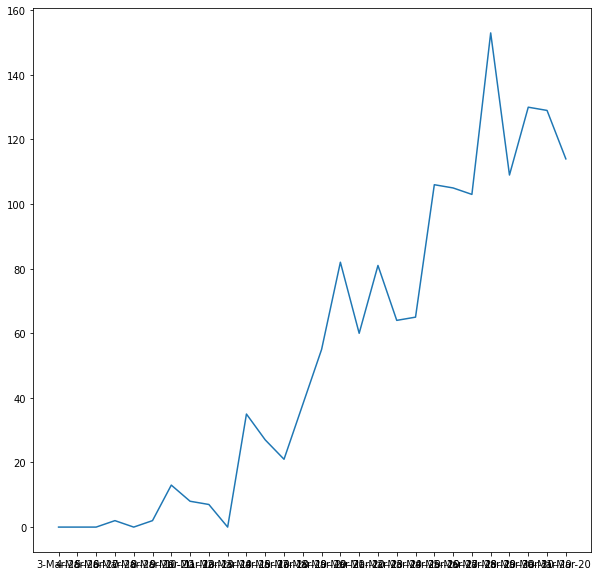

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(cases_df['date'], cases_df['new_confirmed'])

In [ ]:
cases_df

,date,new_tested,acc_tested,new_confirmed,acc_confirmed,acc_negative,being_checked,isolated,new_released,acc_released,new_deceased,acc_deceased,positive_rate,negative_rate,decease_rate,release_rate,dailypositive_rate
1,3-Mar-20,2.0,341,0,2,337,2,2,0,0,0,0,0.59%,98.83%,0.00%,0.00%,0.00%
2,4-Mar-20,31.0,372,0,2,356,14,2,0,0,0,0,0.54%,95.70%,0.00%,0.00%,0.00%
3,5-Mar-20,16.0,388,0,2,371,15,2,0,0,0,0,0.52%,95.62%,0.00%,0.00%,0.00%
4,6-Mar-20,62.0,450,2,4,422,24,4,0,0,0,0,0.89%,93.78%,0.00%,0.00%,3.23%
5,7-Mar-20,4.0,454,0,4,422,28,4,0,0,0,0,0.88%,92.95%,0.00%,0.00%,0.00%
6,8-Mar-20,29.0,483,2,6,445,32,6,0,0,0,0,1.24%,92.13%,0.00%,0.00%,6.90%
7,9-Mar-20,60.0,543,13,19,487,37,19,0,0,0,0,3.50%,89.69%,0.00%,0.00%,21.67%
8,10-Mar-20,151.0,694,8,27,648,19,27,0,0,0,0,3.89%,93.37%,0.00%,0.00%,5.30%
9,11-Mar-20,99.0,793,7,34,744,15,30,2,2,2,2,4.29%,93.82%,5.88%,5.88%,7.07%
10,12-Mar-20,69.0,862,0,34,811,17,27,1,3,2,4,3.94%,94.08%,11.76%,8.82%,0.00%


In [ ]:
cases_prophet_df = cases_df[['date', 'new_confirmed']]
cases_prophet_df = cases_prophet_df.rename(columns={'date':'ds', 'new_confirmed':'y'})
cases_prophet_df

,ds,y
1,3-Mar-20,0
2,4-Mar-20,0
3,5-Mar-20,0
4,6-Mar-20,2
5,7-Mar-20,0
6,8-Mar-20,2
7,9-Mar-20,13
8,10-Mar-20,8
9,11-Mar-20,7
10,12-Mar-20,0


In [ ]:
#model_params = {"daily_seasonality": False, "weekly_seasonality": False, "yearly_seasonality": True, "seasonality_mode": "multiplicative", "growth": "logistic"}
model_params = {"growth":"logistic"}
#m = Prophet(model_params)
m = Prophet(interval_width=0.95)
m.fit(cases_prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.


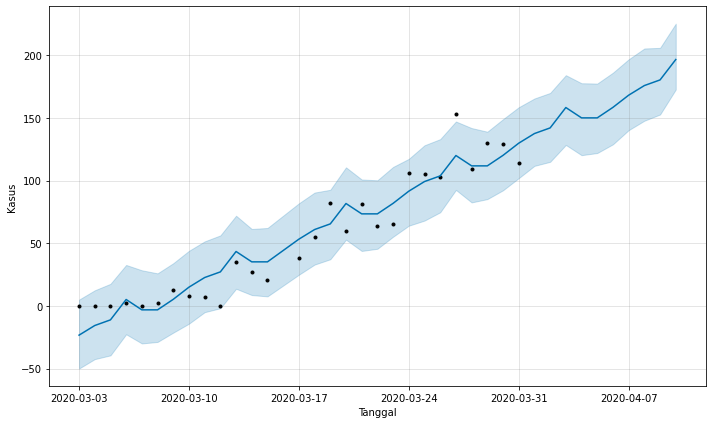

In [ ]:
# Forcasting into the future
future = m.make_future_dataframe(periods=10)
forecast = m.predict(future)

forecast

figure = m.plot(forecast, xlabel='Tanggal', ylabel='Kasus')

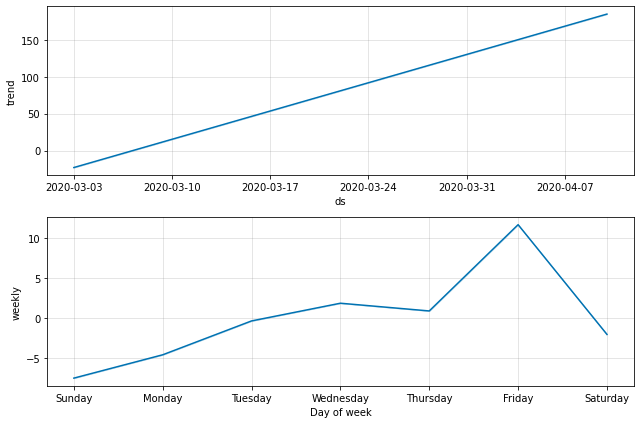

In [ ]:
figure3 = m.plot_components(forecast)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-03,-23.021911,-50.017193,4.977156,-23.021911,-23.021911,-0.346223,-0.346223,-0.346223,-0.346223,-0.346223,-0.346223,0.0,0.0,0.0,-23.368135
1,2020-03-04,-17.551602,-42.495965,12.416184,-17.551602,-17.551602,1.868385,1.868385,1.868385,1.868385,1.868385,1.868385,0.0,0.0,0.0,-15.683217
2,2020-03-05,-12.081292,-39.498115,17.580910,-12.081292,-12.081292,0.901241,0.901241,0.901241,0.901241,0.901241,0.901241,0.0,0.0,0.0,-11.180051
3,2020-03-06,-6.610982,-22.674294,32.650877,-6.610982,-6.610982,11.695161,11.695161,11.695161,11.695161,11.695161,11.695161,0.0,0.0,0.0,5.084179
4,2020-03-07,-1.140672,-29.984076,28.391935,-1.140672,-1.140672,-2.032907,-2.032907,-2.032907,-2.032907,-2.032907,-2.032907,0.0,0.0,0.0,-3.173579
5,2020-03-08,4.329637,-28.795663,25.945707,4.329637,4.329637,-7.503198,-7.503198,-7.503198,-7.503198,-7.503198,-7.503198,0.0,0.0,0.0,-3.173560
6,2020-03-09,9.799947,-21.366067,34.032997,9.799947,9.799947,-4.582459,-4.582459,-4.582459,-4.582459,-4.582459,-4.582459,0.0,0.0,0.0,5.217488
7,2020-03-10,15.270257,-14.203863,43.919345,15.270257,15.270257,-0.346223,-0.346223,-0.346223,-0.346223,-0.346223,-0.346223,0.0,0.0,0.0,14.924033
8,2020-03-11,20.740567,-5.042670,51.452859,20.740567,20.740567,1.868385,1.868385,1.868385,1.868385,1.868385,1.868385,0.0,0.0,0.0,22.608951
9,2020-03-12,26.210876,-1.878667,56.236696,26.210876,26.210876,0.901241,0.901241,0.901241,0.901241,0.901241,0.901241,0.0,0.0,0.0,27.112118


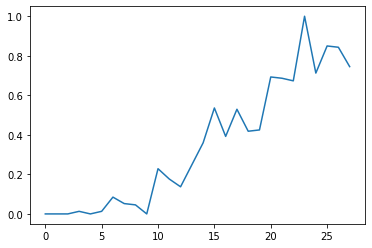

In [ ]:
x=np.array(cases_prophet_df['y'])
x=x.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_y = scaler.fit_transform(x)
plt.plot(scaled_y)
plt.show()

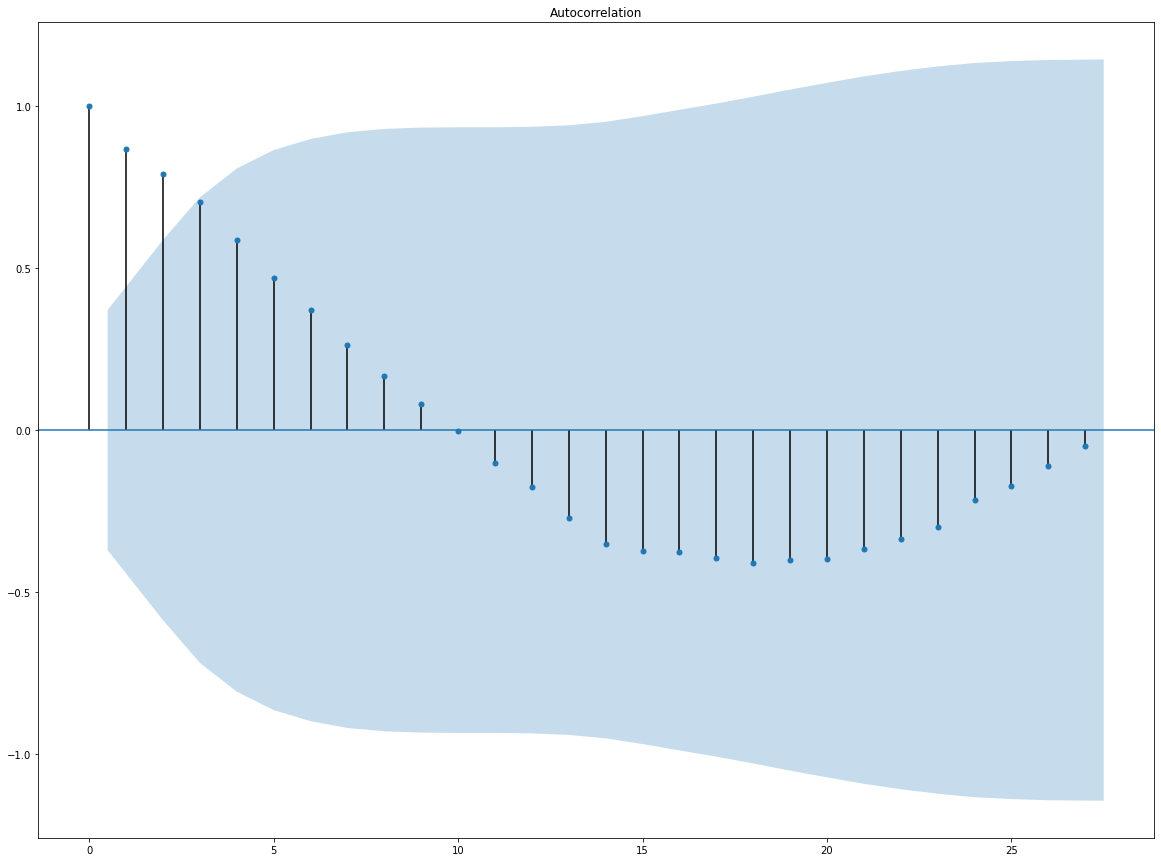

In [ ]:
scaled_y.shape
# acf/pacf plot
fig,ax = plt.subplots(figsize=(20,15))
sm.graphics.tsa.plot_acf(scaled_y,lags=27,ax=ax);

In [ ]:
# create function of timewindow
def timewindow(y, window):
    obs  = len(y)-window
    yt   = y[:obs,:]
    for i in np.arange(1,window+1):
        yt = np.hstack((yt, y[i:obs+i,:]))
    return yt
scaled_data = timewindow(scaled_y,1)

In [ ]:
scaled_data

array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.0130719 ],
       [0.0130719 , 0.        ],
       [0.        , 0.0130719 ],
       [0.0130719 , 0.08496732],
       [0.08496732, 0.05228758],
       [0.05228758, 0.04575163],
       [0.04575163, 0.        ],
       [0.        , 0.22875817],
       [0.22875817, 0.17647059],
       [0.17647059, 0.1372549 ],
       [0.1372549 , 0.24836601],
       [0.24836601, 0.35947712],
       [0.35947712, 0.53594771],
       [0.53594771, 0.39215686],
       [0.39215686, 0.52941176],
       [0.52941176, 0.41830065],
       [0.41830065, 0.4248366 ],
       [0.4248366 , 0.69281046],
       [0.69281046, 0.68627451],
       [0.68627451, 0.67320261],
       [0.67320261, 1.        ],
       [1.        , 0.7124183 ],
       [0.7124183 , 0.8496732 ],
       [0.8496732 , 0.84313725],
       [0.84313725, 0.74509804]])

In [ ]:
n_data,n_var = scaled_data.shape
n_data,n_var

n_test = int(0.2*n_data)
n_test

5

In [ ]:
X_scaled_train = scaled_data[:-n_test,:-1]
y_scaled_train = scaled_data[:-n_test,-1]

X_scaled_test = scaled_data[-n_test:,:-1]
y_scaled_test = scaled_data[-n_test:,-1]

In [ ]:
# reshape X_train and X_test to ndim = 3
X_scaled_train = np.reshape(X_scaled_train, (X_scaled_train.shape[0], 1, X_scaled_train.shape[1]))
X_scaled_test  = np.reshape(X_scaled_test,  (X_scaled_test.shape[0], 1, X_scaled_test.shape[1]))

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([tf.keras.layers.LSTM(4, input_shape=(1,1)),
                                    tf.keras.layers.Dense(1),])

optimizer = tf.keras.optimizers.Adam(learning_rate=2e-04)
model.compile(loss=tf.keras.losses.Huber(),optimizer=optimizer,metrics=["mae"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4)                 96        
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
max_mae = 0.005 ; # 0.5% from scaled data

class StopCond(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('mae')<max_mae):
            print("MAE threshold condition has been satisfied.")
            self.model.stop_training = True


early_stopping    = StopCond()

In [ ]:
start_time = time.time()
history = model.fit(X_scaled_train,y_scaled_train,epochs=100,batch_size = 1,callbacks = [early_stopping])

In [ ]:
end_time = time.time()
durasi = (end_time - start_time)/60

print("Time elapsed to train model :",durasi,"minutes.")

Time elapsed to train model : 0.9002065817515056 minutes.


In [ ]:
y_scaled_test_predict = model.predict(X_scaled_test)

mae = mean_absolute_error(y_scaled_test_predict,y_scaled_test)
print("MAE : " + str(mae) + " --> " + str(round(mae,3)*100) + "% of scaled data.")

MAE : 0.41085583150776384 --> 41.099999999999994% of scaled data.


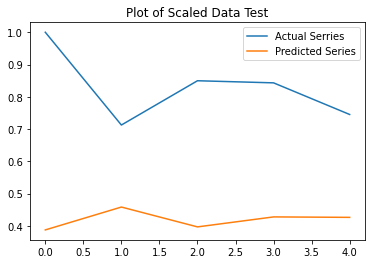

In [ ]:
plt.plot(y_scaled_test, label = 'Actual Serries')
plt.plot(y_scaled_test_predict, label = 'Predicted Series')
plt.title('Plot of Scaled Data Test')
plt.legend()
plt.show()